# Contributions Analysis of SHAP

In [1]:
%pwd

'/mnt/d/OneDrive - Kyushu University/ESG09_Article/Code'

In [2]:
%cd ..

/mnt/d/OneDrive - Kyushu University/ESG09_Article


/home/linux/anaconda3/envs/automl/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Import Package

In [3]:
import matplotlib.pyplot as plt
from joblib import dump, load
import os 
import pandas as pd

## Contribution Analysis

### Load Data

In [4]:
Shap_df = load("Results/Shap_GenderTreamentDifference.joblib")

In [5]:
Concat_Shap = pd.concat(Shap_df, axis=0)

In [6]:
Concat_Shap.shape

(191122, 451)

In [7]:
colnames = Concat_Shap.columns

In [88]:
Concat_Shap.to_parquet("Results/Shap_GenderTreamentDifference.parquet")

In [ ]:
Concat_Shap = pd.read_parquet("Results/Shap_GenderTreamentDifference.parquet")

### Visual the Top 10 Variables

In [18]:
shap_colnames = [item for item in colnames if '_shap' in item if 'Country_' not in item]

In [19]:
Concat_Shap[shap_colnames].mean(axis=0).abs().sort_values(ascending=False).head(20)

INCOME_2_shap               0.009316
Enough_food_shap            0.004757
Age_shap                    0.004523
Marital_status_shap         0.003909
Enjoyment_shap              0.003193
wave_shap                   0.002497
Freedom_chooselife_shap     0.002472
Corruption_business_shap    0.002411
Conf_military_shap          0.001988
Voice_official_shap         0.001845
Income_level_shap           0.001728
Feeling_income_shap         0.001666
Stolen_shap                 0.001638
Worry_shap                  0.001430
Stress_shap                 0.001409
Health_disable_shap         0.001374
Children_respected_shap     0.001364
Anger_shap                  0.001345
Good_minorities_shap        0.001287
Sat_oppofriend_shap         0.001240
dtype: float32

In [24]:
top10 = Concat_Shap[shap_colnames].mean(axis=0).abs().sort_values(ascending=False).index[0:10]

In [30]:
means = Concat_Shap[top10].mean(axis=0)

In [31]:
std_errors = Concat_Shap[top10].sem(axis=0)

In [32]:
columns_of_interest = ['Income', 'Having Enough Food Dummy', 'Age', 'Marital Status', 'Having Enjoyment Dummy',
                      'Wave', 'Feeling Freedom of Choosing Life Dummy', 'Prevailing Corruption within Business Dummy',
                      'Feeling Confidence in Military Dummy', 'Voiced Opinion to Official Dummy']

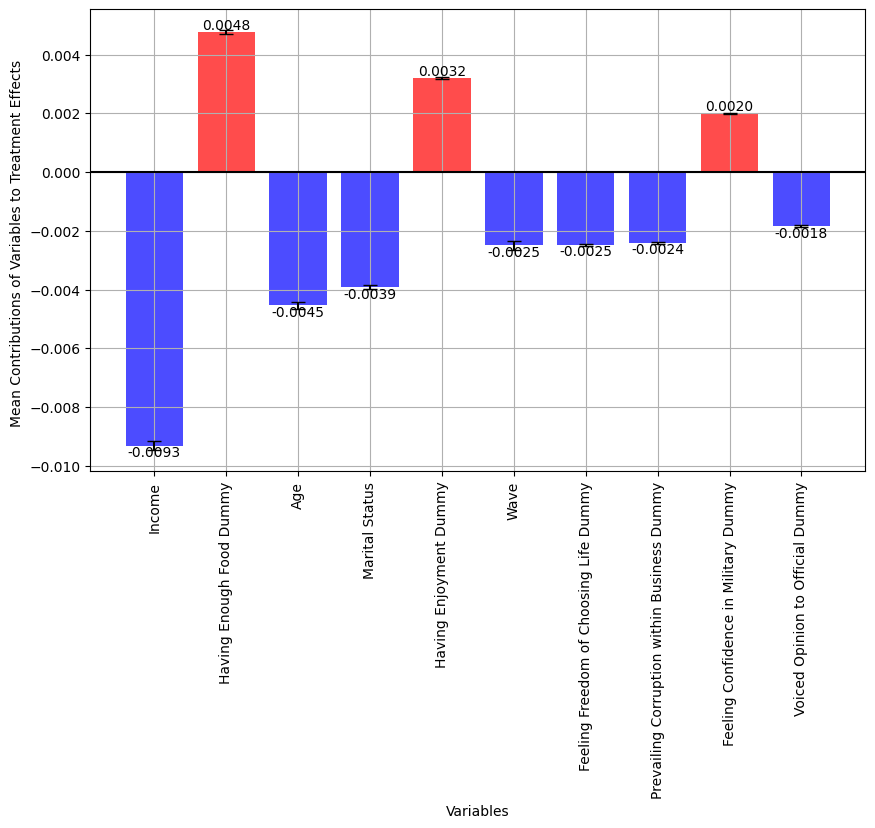

In [41]:
colors = ['red' if value > 0 else 'blue' for value in means]

plt.figure(figsize=(10, 6))
bars = plt.bar(x=columns_of_interest, height=means, yerr=std_errors, capsize=5, color=colors, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom' if yval > 0 else 'top', fontsize=10)

# Adding labels and title
plt.xlabel('Variables')
plt.ylabel('Mean Contributions of Variables to Treatment Effects ')
plt.xticks(rotation=90)
plt.grid()

plt.savefig('Figures/MJ_ShapTreatmentEffectGender.jpg', format='jpg', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

### Visual the Top 10 Country

In [55]:
shap_colnames = [item for item in colnames if '_shap' in item if 'Country_' in item]

In [56]:
Concat_Shap[shap_colnames].mean(axis=0).abs().sort_values(ascending=False).head(20)

Country_JOR_shap    0.003569
Country_IRN_shap    0.003296
Country_UZB_shap    0.003225
Country_SLE_shap    0.003058
Country_NIC_shap    0.002894
Country_KAZ_shap    0.002530
Country_PER_shap    0.002298
Country_DOM_shap    0.002011
Country_COD_shap    0.001930
Country_COG_shap    0.001886
Country_TCD_shap    0.001776
Country_PSE_shap    0.001755
Country_YEM_shap    0.001594
Country_GHA_shap    0.001442
Country_BWA_shap    0.001388
Country_IRQ_shap    0.001375
Country_SAU_shap    0.001366
Country_TZA_shap    0.001364
Country_MDG_shap    0.001271
Country_PRY_shap    0.001238
dtype: float32

In [76]:
top10 = Concat_Shap[shap_colnames].mean(axis=0).abs().sort_values(ascending=False).index[0:41]

In [77]:
means = Concat_Shap[top10].mean(axis=0)

In [78]:
std_errors = Concat_Shap[top10].sem(axis=0)

In [84]:
columns_of_interest = top10
columns_of_interest = [item.replace('Country_', '').replace('_shap', '') for item in columns_of_interest]

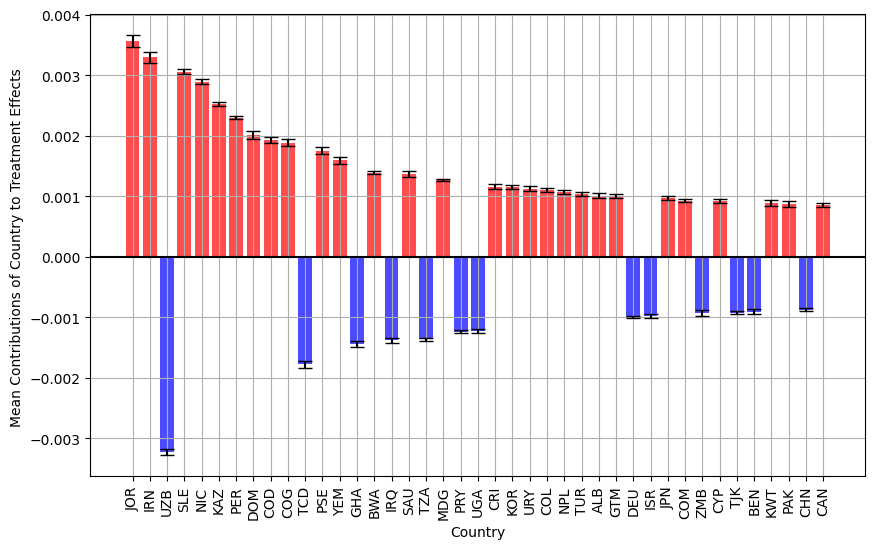

In [86]:
top10 = Concat_Shap[shap_colnames].mean(axis=0).abs().sort_values(ascending=False).index[0:41]
means = Concat_Shap[top10].mean(axis=0)
std_errors = Concat_Shap[top10].sem(axis=0)
columns_of_interest = top10
columns_of_interest = [item.replace('Country_', '').replace('_shap', '') for item in columns_of_interest]

colors = ['red' if value > 0 else 'blue' for value in means]

plt.figure(figsize=(10, 6))
bars = plt.bar(x=columns_of_interest, height=means, yerr=std_errors, capsize=5, color=colors, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Mean Contributions of Country to Treatment Effects ')
plt.xticks(rotation=90)
plt.grid()

plt.savefig('Figures/MJ_ShapCountryTreatmentEffectGender.jpg', format='jpg', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()